### Paso 1: Importamos las librerías a utilizar

In [5]:
# Libreria para estadísticas
import numpy as np
# Libreria para manejo de datos
import pandas as pd
# Libreria para gráficas 2D
import matplotlib.pyplot as plt

# Libreria para el preprocesamiento
from sklearn import preprocessing
# Libreria para separar los datos de entrenemiento y pruebas
from sklearn.model_selection import train_test_split
# Libreria para Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Libreria para la métrica accuracy
from sklearn.metrics import accuracy_score

In [8]:
# Cargamos los datos
data = pd.read_csv("nb.csv", sep=";")
data

,clima,temperatura,jugar
0,soleado,caliente,no
1,soleado,caliente,si
2,nublado,caliente,si
3,lluvioso,templado,si
4,luvioso,frio,no
5,lluvioso,frio,no
6,nublado,frio,si
7,soleado,templado,no
8,soleado,frio,si
9,lluvioso,templado,si


In [10]:
# Se reemplaza 'luvioso' por 'lluvioso'
data = data.replace('luvioso', 'lluvioso')
data

,clima,temperatura,jugar
0,soleado,caliente,no
1,soleado,caliente,si
2,nublado,caliente,si
3,lluvioso,templado,si
4,lluvioso,frio,no
5,lluvioso,frio,no
6,nublado,frio,si
7,soleado,templado,no
8,soleado,frio,si
9,lluvioso,templado,si


In [12]:
# Se convierten los valores de las columnas de texto a numérico
le = preprocessing.LabelEncoder()

data['clima_nuevo'] = le.fit_transform( data['clima'])
data['temperatura_nuevo'] = le.fit_transform( data['temperatura'] )
data['juegar_nuevo'] = le.fit_transform( data['jugar'] )
data

,clima,temperatura,jugar,clima_nuevo,temperatura_nuevo,juegar_nuevo
0,soleado,caliente,no,2,0,0
1,soleado,caliente,si,2,0,1
2,nublado,caliente,si,1,0,1
3,lluvioso,templado,si,0,2,1
4,lluvioso,frio,no,0,1,0
5,lluvioso,frio,no,0,1,0
6,nublado,frio,si,1,1,1
7,soleado,templado,no,2,2,0
8,soleado,frio,si,2,1,1
9,lluvioso,templado,si,0,2,1


In [13]:
# Se observan las estadísticas
data.describe()

,clima_nuevo,temperatura_nuevo,juegar_nuevo
count,14.000000,14.000000,14.000000
mean,1.000000,1.142857,0.642857
std,0.877058,0.864438,0.497245
min,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,1.000000
max,2.000000,2.000000,1.000000


<Axes: >

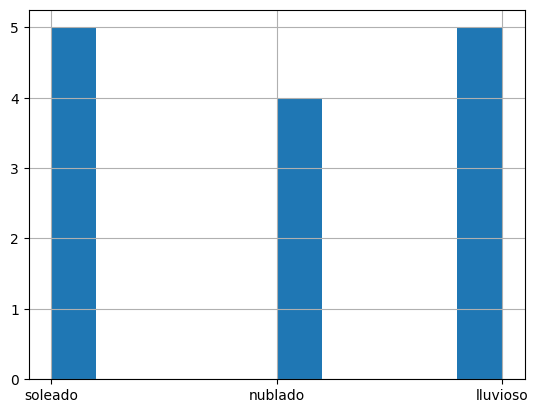

In [14]:
# se genera un histograma de clima
data['clima'].hist()

In [17]:
# Se seleccionan las características y la variable objetivo
features = ['clima_nuevo', 'temperatura_nuevo']
X = data[features].values
y = data['juegar_nuevo']

# Se define el modelo de predicción
nb = GaussianNB()

# Se entrena el modelo con todos los datos de las características y variable objetivo
nb.fit(X, y)

# Se genera una nueva predicción para [2, 2] --> Soleado, templado
prediction = nb.predict( [[2,2]] )

# Se imprime el valor de la predicción
print("Predicción:", prediction)

Predicción: [1]


In [33]:
### Se genera un nueva predicción separando los datos de entrenamiento y pruebas
# Se seleccionan las caracteristicas y variable objetivo
features = ['clima_nuevo', 'temperatura_nuevo']
X = data[features].values
y = data['juegar_nuevo']

# Se separan los datos de entrenamiento y pruebas (80% entrenamiento y 20% pruebas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Se define el modelo de predicción
nb = GaussianNB()

# Se entrena el modelo
nb.fit(X_train, y_train)

# Se genera la predicción
prediction = nb.predict(X_test)

# Se imprime el accuracy
print("Accuracy: ", round(accuracy_score(y_test, prediction), 2) )

Accuracy:  0.33
